<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/Reto_2_Tania_Mart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Distribución Agregada de Pérdidas**

Se quiere caracterizar (Media, Desviación, Asimetría, Kurtosis) la distribución agregada de pérdidas como resultado de las pérdidas asociadas a los créditos que posee una FINTECH. Las variables que definen la Loss Distribution Approach (LDA) se obtiene del producto de las siguientes variables:
* Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
* Probabilidad Default (PD): Es la probabilidad de que una persona incumpla el crédito a lo largo de su vigencia.
* LGD (Loss Guarantee Default): La garantia que el solicitante puede colocar sobre el crédito (Carro, Casa, Beca, Finca).

Adicional, se quiere realizar un muestreo aleatorio para mirar la confiabilidad de los datos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
from google.colab import drive #Conexión Automática con el Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=10  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='green')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges = np.histogram(LDA, bins=NC)
  LI = bin_edges[:-1]; LS=bin_edges[1:]
  mc = (LI+LS)/2 #El valor representativo de cada intervalo
  freq = counts/np.sum(counts)

  return LI,LS,counts,mc, freq

In [ ]:
# @title 2. Caracterización de la Distribución de Pérdidas
def Caractx(e3,e4):

  counts=e3;mc=e4
  u=np.sum(mc*counts)/np.sum(counts) #valor esperado - media de los datos
  varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
  desviacion=np.sqrt(varianza)

  #Quiero identificar datos raros o outliers
  LIe = u-2*desviacion;  LSe = u+2*desviacion
  filas_out = np.where((LDA<LIe)|(LDA>LSe))[0]

  #Coeficiente de Asimetría
  cas = np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
  vcas = (skew(LDA)-cas)/skew(LDA)

  #Coeficiente de Curtosis
  curt=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3

  return u,varianza,desviacion,cas,curt,filas_out

Año 1
Hoja 5


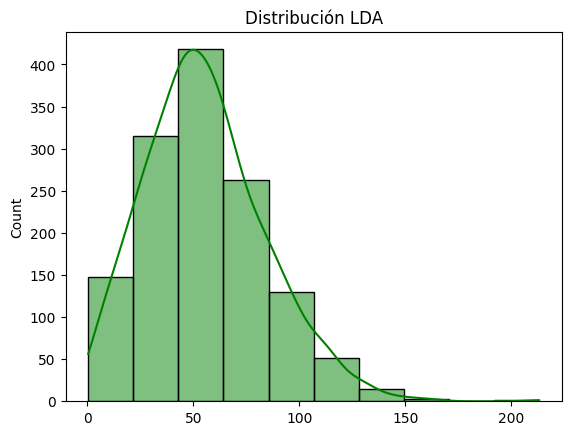

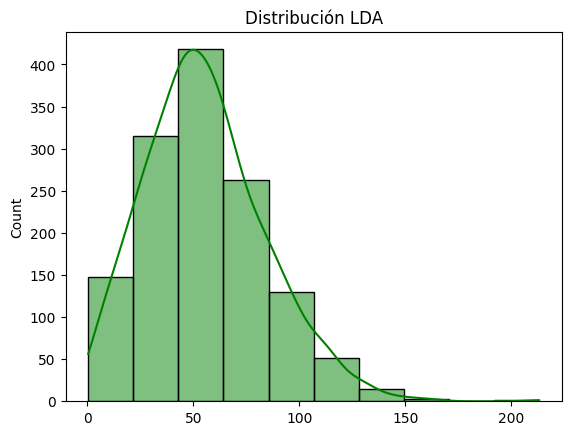

,LI,LS,ND,Perdida,Frecuencia
0,0.413092,21.695260,147.0,11.054176,0.109538
1,21.695260,42.977428,315.0,32.336344,0.234724
2,42.977428,64.259597,418.0,53.618513,0.311475
3,64.259597,85.541765,263.0,74.900681,0.195976
4,85.541765,106.823933,130.0,96.182849,0.096870
5,106.823933,128.106101,51.0,117.465017,0.038003
6,128.106101,149.388270,14.0,138.747186,0.010432
7,149.388270,170.670438,3.0,160.029354,0.002235
8,170.670438,191.952606,0.0,181.311522,0.000000
9,191.952606,213.234775,1.0,202.593690,0.000745


La media de los datos es: 55.91800167999396
La varianza de los datos es: 836.1104127631511
La desviación de los datos es: 28.91557387919443
El coeficiente de asimetría es: 0.5936899030624093
El coeficiente de curtosis: 0.49072605058951346
Los outliers se ubican en: [  16   26   46   81   85  138  190  231  246  292  296  363  371  410
  411  467  475  495  528  571  576  597  602  613  718  796  801  828
  831  837  839  853  854  864  917 1034 1063 1099 1108 1134 1191 1228
 1330]
La pérdida esperada es: 729
Operational Value at Risk (OpVar): 161.29129989014118
La pérdida catastrófica es: 2
La pérdida no esperada: 611
10000


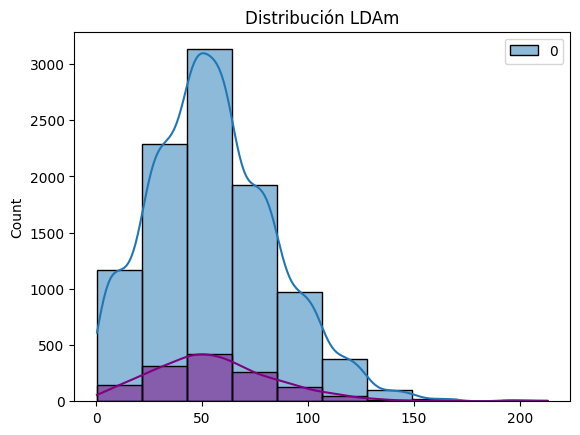

Información LDA original
La media es: 55.53415928136799
La varianza es: 808.8474818320534
El coeficiente de asimetría es: 0.6074481010737891
El coeficiente de curtosis es: 0.6938886954460353
Información LDA muestreada
La media es: 55.52094703803359
La varianza es: 881.635692559066
El coeficiente de asimetría es: [0.5596206]
El coeficiente de curtosis es: [0.52495144]
La diferencia porcentual de las medias es: 0.023791200776912873
La diferencia porcentual de las varianzas es: -8.999003194291468
La diferencia porcentual del coeficiente de asimetría es: [7.87351153]
La diferencia porcentual del coeficiente de curtosis es: [24.34644892]
Año 2
Hoja 4


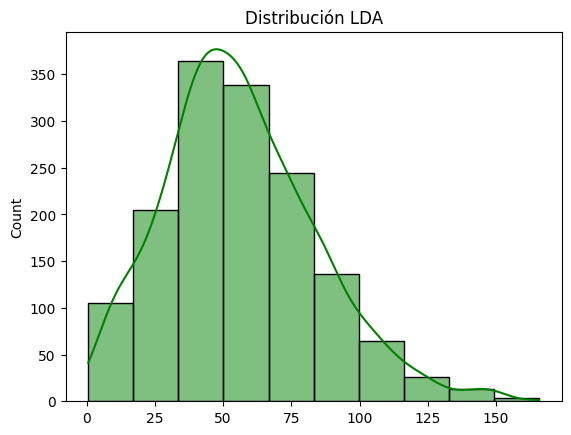

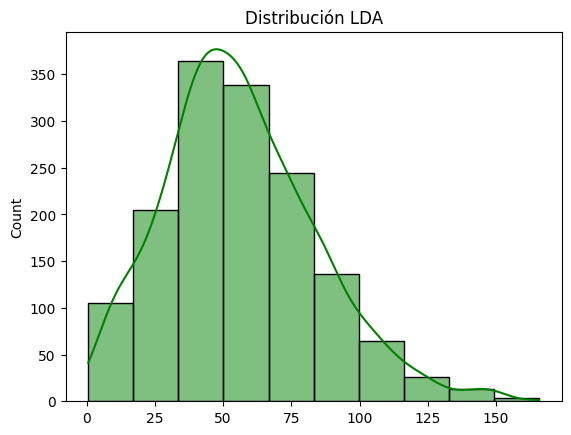

,LI,LS,ND,Perdida,Frecuencia
0,0.568346,17.091246,105.0,8.829796,0.070000
1,17.091246,33.614145,205.0,25.352695,0.136667
2,33.614145,50.137045,364.0,41.875595,0.242667
3,50.137045,66.659945,338.0,58.398495,0.225333
4,66.659945,83.182844,244.0,74.921395,0.162667
5,83.182844,99.705744,136.0,91.444294,0.090667
6,99.705744,116.228644,65.0,107.967194,0.043333
7,116.228644,132.751544,26.0,124.490094,0.017333
8,132.751544,149.274443,13.0,141.012993,0.008667
9,149.274443,165.797343,4.0,157.535893,0.002667


La media de los datos es: 56.36067049807551
La varianza de los datos es: 794.299449263555
La desviación de los datos es: 28.18331863467386
El coeficiente de asimetría es: 0.5398359603970553
El coeficiente de curtosis: 0.2591591450063109
Los outliers se ubican en: [  35  102  122  143  201  254  286  287  398  404  408  446  479  501
  532  559  578  595  648  665  713  726  765  769  793  795  817  822
  829  963  965  992 1007 1046 1105 1160 1215 1231 1232 1243 1283 1290
 1342 1343 1387 1395 1398 1409 1436]
La pérdida esperada es: 813
Operational Value at Risk (OpVar): 149.7093186014969
La pérdida catastrófica es: 2
La pérdida no esperada: 685
10000


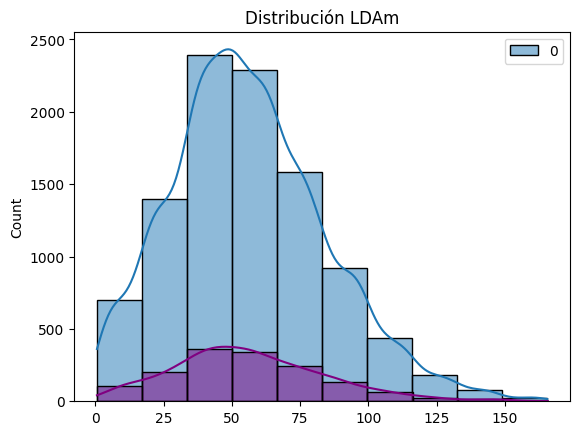

Información LDA original
La media es: 56.30885418289803
La varianza es: 771.2403140774804
El coeficiente de asimetría es: 0.5654219317544418
El coeficiente de curtosis es: 0.3749822454394929
Información LDA muestreada
La media es: 56.17651084116947
La varianza es: 812.2559850470853
El coeficiente de asimetría es: [0.50643475]
El coeficiente de curtosis es: [0.22259786]
La diferencia porcentual de las medias es: 0.23503113968310718
La diferencia porcentual de las varianzas es: -5.3181440623556915
La diferencia porcentual del coeficiente de asimetría es: [10.43241833]
La diferencia porcentual del coeficiente de curtosis es: [40.63775883]
Año 3
Hoja 3


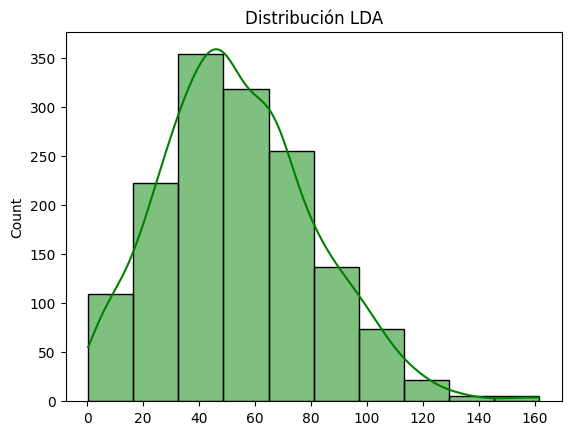

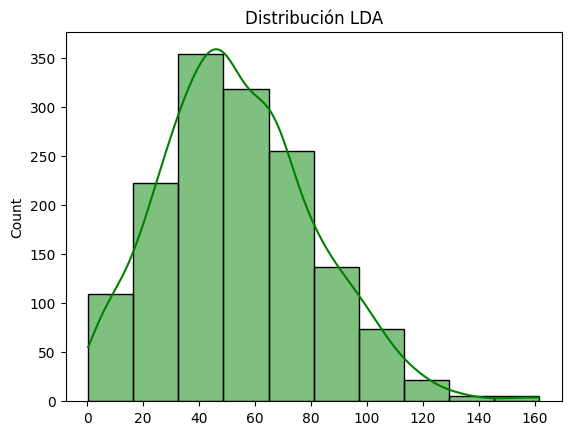

,LI,LS,ND,Perdida,Frecuencia
0,0.427835,16.545128,109.0,8.486481,0.072618
1,16.545128,32.662422,222.0,24.603775,0.147901
2,32.662422,48.779716,354.0,40.721069,0.235843
3,48.779716,64.897009,318.0,56.838362,0.211859
4,64.897009,81.014303,255.0,72.955656,0.169887
5,81.014303,97.131597,137.0,89.072950,0.091272
6,97.131597,113.248890,74.0,105.190244,0.049300
7,113.248890,129.366184,22.0,121.307537,0.014657
8,129.366184,145.483478,5.0,137.424831,0.003331
9,145.483478,161.600771,5.0,153.542125,0.003331


La media de los datos es: 54.35795284724899
La varianza de los datos es: 746.4973760157775
La desviación de los datos es: 27.32210416523181
El coeficiente de asimetría es: 0.46305726633508854
El coeficiente de curtosis: 0.05620072169277224
Los outliers se ubican en: [  18   52   58   63  100  104  122  170  207  237  322  352  369  378
  460  496  503  504  593  599  625  671  731  761  765  782  825  836
  874  885  906  964 1018 1024 1029 1039 1083 1117 1151 1161 1192 1193
 1203 1276 1390 1433]
La pérdida esperada es: 809
Operational Value at Risk (OpVar): 160.70668633158058
La pérdida catastrófica es: 2
La pérdida no esperada: 690
10000


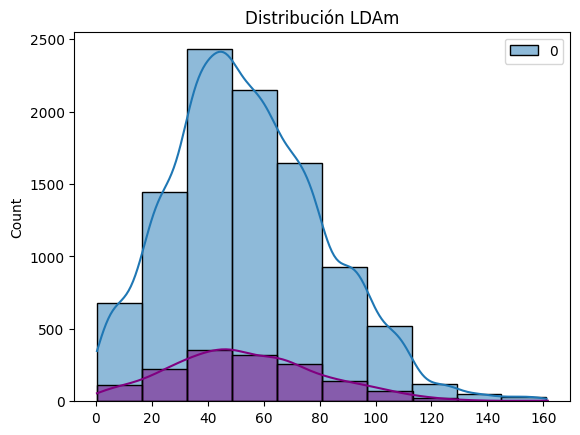

Información LDA original
La media es: 54.14913274996507
La varianza es: 741.704749232986
El coeficiente de asimetría es: 0.46219026649218486
El coeficiente de curtosis es: 0.18859622645960705
Información LDA muestreada
La media es: 54.41453787920327
La varianza es: 752.4303405083151
El coeficiente de asimetría es: [0.46263406]
El coeficiente de curtosis es: [0.10563848]
La diferencia porcentual de las medias es: -0.49013735910364103
La diferencia porcentual de las varianzas es: -1.446072886336598
La diferencia porcentual del coeficiente de asimetría es: [-0.09602044]
La diferencia porcentual del coeficiente de curtosis es: [43.9869577]
Año 4
Hoja 2


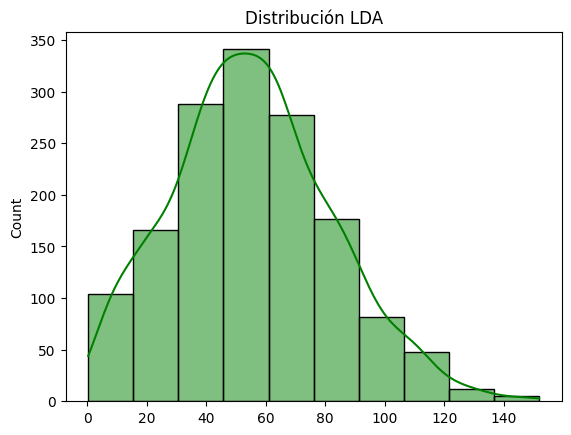

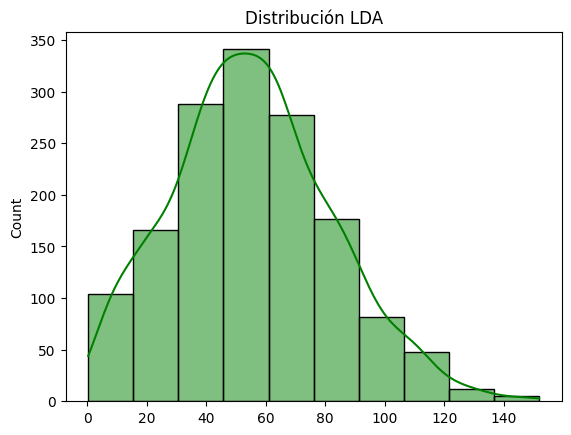

,LI,LS,ND,Perdida,Frecuencia
0,0.354255,15.502616,104.0,7.928435,0.069333
1,15.502616,30.650978,166.0,23.076797,0.110667
2,30.650978,45.799339,288.0,38.225159,0.192000
3,45.799339,60.947701,341.0,53.373520,0.227333
4,60.947701,76.096063,277.0,68.521882,0.184667
5,76.096063,91.244424,177.0,83.670243,0.118000
6,91.244424,106.392786,82.0,98.818605,0.054667
7,106.392786,121.541148,48.0,113.966967,0.032000
8,121.541148,136.689509,12.0,129.115328,0.008000
9,136.689509,151.837871,5.0,144.263690,0.003333


La media de los datos es: 55.66597231387269
La varianza de los datos es: 738.0837467102078
La desviación de los datos es: 27.167696750188593
El coeficiente de asimetría es: 0.33970946303261645
El coeficiente de curtosis: -0.1037825028068542
Los outliers se ubican en: [  25   32   52   71  114  155  259  294  335  342  361  373  386  388
  394  407  435  529  532  537  540  639  660  700  733  735  747  775
  813  829  853  912  916  926  945  948  970  985  998 1016 1048 1049
 1084 1094 1175 1221 1292 1298 1327 1413]
La pérdida esperada es: 781
Operational Value at Risk (OpVar): 147.29776773898615
La pérdida catastrófica es: 2
La pérdida no esperada: 717
10000


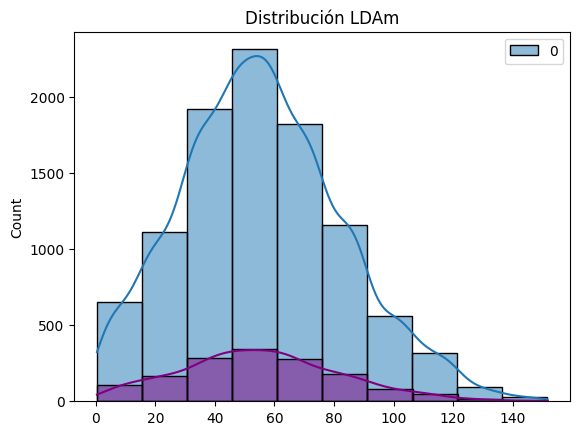

Información LDA original
La media es: 55.52792809830674
La varianza es: 723.4279394056008
El coeficiente de asimetría es: 0.3354409078926966
El coeficiente de curtosis es: -0.06285449119370945
Información LDA muestreada
La media es: 55.869895792808116
La varianza es: 749.7443971792758
El coeficiente de asimetría es: [0.33707305]
El coeficiente de curtosis es: [-0.10723891]
La diferencia porcentual de las medias es: -0.6158481078133466
La diferencia porcentual de las varianzas es: -3.63774418158327
La diferencia porcentual del coeficiente de asimetría es: [-0.48656686]
La diferencia porcentual del coeficiente de curtosis es: [-70.61455886]


In [ ]:
# @title 3. Caracterización de las Pérdidas de la Distribución Agregada
# Variables de Entrada: Media de la LDA
# Variables de Salida: Pérdidas Esperadas, OpVar, Pérdidas Catastróficas,
# Pérdidas No Esperadas.
def Perdx(e5):

  u=e5
  PE=len(np.where(LDA<u)[0])

  OpVar=np.percentile(LDA,99.9)

  PC=len(np.where(LDA>OpVar)[0])

  PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])

  return PE,OpVar,PC,PNE

nxl='/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx'
m1=0
for k in range(5,1  ,-1):
  m1=m1+1
  print("Año",m1)
  print("Hoja",k)
  XDB=pd.read_excel(nxl,sheet_name=k)
  LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
  XDB['LDA']=LDA

  LI, LS, counts, mc, freq = Histx(LDA)
  df = pd.DataFrame({'LI': LI, 'LS': LS, 'mc': mc, 'ND' : counts, 'Freq': freq})
  #display(df)
  df.to_excel('Histograma.xlsx')
  #display(XDB)
  e1,e2,e3,e4,e5=Histx(LDA)

  #Mostrar la tabla con los resultados de la caracterización LDA
  T1=np.column_stack((e1,e2,e3,e4,e5))
  df=pd.DataFrame(T1,columns=['LI','LS','ND','Perdida','Frecuencia'])
  display(df)

  e5,e6,e7,e8,e9,e10=Caractx(e3,e4)
  print("La media de los datos es:",e5)
  print("La varianza de los datos es:",e6)
  print("La desviación de los datos es:",e7)
  print("El coeficiente de asimetría es:",e8)
  print("El coeficiente de curtosis:",e9)
  print("Los outliers se ubican en:",e10)

  e11,e12,e13,e14=Perdx(e5)
  print("La pérdida esperada es:",e11)
  print("Operational Value at Risk (OpVar):",e12)
  print("La pérdida catastrófica es:",e13)
  print("La pérdida no esperada:",e14)

  acum = np.cumsum(freq)
  Confiabilidad = 9999 + 1 #Confiabilidad de 99,99%
  print(Confiabilidad)

  LDAm = np.zeros((Confiabilidad, 1))  #LDAm = LDA muestreada, la variable muestreada

  for a in range(Confiabilidad):
    al = np.random.uniform(0,1)  #Es el aleatorio entre cero y uno
    inter = np.where(al <= acum) [0][0]
    #print("Limite inferior:", LI[inter])
    #print("Limite superior:", LS[inter])
    LDAm[a,] = np.random.uniform(LI[inter], LS[inter])
    #print("El número seleccionado es:", LDAm[a,])

  plt.figure()
  sns.histplot(LDAm, kde=True, bins=10, color='green')
  sns.histplot(LDA, kde=True, bins=10, color='purple') # Se grafica la LDA original
  plt.title('Distribución LDAm')
  plt.show()

  print("Información LDA original")
  print("La media es:", np.mean(LDA))
  print("La varianza es:", np.var(LDA))
  print("El coeficiente de asimetría es:", skew(LDA))
  print("El coeficiente de curtosis es:", kurtosis(LDA))

  print("Información LDA muestreada")
  print("La media es:", np.mean(LDAm))
  print("La varianza es:", np.var(LDAm))
  print("El coeficiente de asimetría es:", skew(LDAm))
  print("El coeficiente de curtosis es:", kurtosis(LDAm))

#Las diferencias entre las metricas son
  dif_u = (np.mean(LDA)-np.mean(LDAm))/np.mean(LDA)
  print("La diferencia porcentual de las medias es:", dif_u*100)
  dif_v = (np.var(LDA)-np.var(LDAm))/np.var(LDA)
  print("La diferencia porcentual de las varianzas es:", dif_v*100)
  dif_sk = (skew(LDA)-skew(LDAm))/skew(LDA)
  print("La diferencia porcentual del coeficiente de asimetría es:", dif_sk*100)
  dif_ku = (kurtosis(LDA)-kurtosis(LDAm))/kurtosis(LDA)
  print("La diferencia porcentual del coeficiente de curtosis es:", dif_ku*100)

**Conclusión General**

A lo largo de los cuatro años analizados, la estructura de los datos se mantuvo constante, con una proporción de valores atípicos siempre por debajo del 5 % (entre el 2,87 % y el 3,26 % a lo largo de los años), lo que indica una buena calidad de los datos y una baja incidencia de valores extremos. Las pérdidas  medias se mantuvieron estables, oscilando entre 54,36 USD (año 3) y 56,36 USD (año 2) por evento de pérdida, mientras que la desviación estándar se mantuvo constante entre 27,17 USD (año 4) y 28,92 USD (año 1).

El análisis de asimetría revela que, en todos los años, la distribución de las pérdidas tiene una ligera cola derecha, lo que indica la existencia de algunos casos con pérdidas más elevadas. Sin embargo, el coeficiente de asimetría muestra una tendencia a la baja a lo largo del tiempo (de 0,59 en el año 1 a 0,34 en el año 4), lo que indica una reducción gradual de la irregularidad de la distribución. En cuanto a la curtosis, los valores oscilan entre -0,10 (año 4) y 0,69 (año 1), con un valor cercano a cero (0,06) en el año 3, lo que sugiere una distribución más cercana a una distribución normal y menos propensa a valores extremos en ese año.

Adicional, de acuerdo con el muestreo aleatorio realizado con una confiabilidad de 99.99%, se puede observar que a medida que la confiabilidad de los datos aumenta, el LDA muestreado tiende a tener comportamientos similares a la LDA original en todas las hojas. Esto se puede corroborar a partir de las diferencias porcentuales entre dichas métricas para cada uno de los años analizados:


**Año 1**

LDA Orginal                                    
Media: 55.5                                   
Coeficiente de asimetría: 0.60                 
Coeficiente de curtosis: 0.69                 

LDA Muestreada:
Media: 55.5
Coeficiente de asimetría:0.5
Coeficiente de curtosis: 0.5

**Año 2**
LDA Orginal
Media: 56.3
Coeficiente de asimetría: 0.60
Coeficiente de curtosis: 0.69

LDA Muestreada:
Media: 56.1
Coeficiente de asimetría:0.5
Coeficiente de curtosis: 0.2

**Año 3**
LDA Orginal
Media: 54.1
Coeficiente de asimetría: 0.46
Coeficiente de curtosis: 0.18

LDA Muestreada:
Media: 54.4
Coeficiente de asimetría:0.46
Coeficiente de curtosis: 0.1

**Año 4**
LDA Orginal
Media: 55.5
Coeficiente de asimetría: 0.3
Coeficiente de curtosis: -0.06

LDA Muestreada:
Media: 55.8
Coeficiente de asimetría:0.3
Coeficiente de curtosis: -0.10


Al comparar los resultados originales con los muestreados, se evidencia que el procedimiento de muestreo logra replicar adecuadamente las características de la distribución original. Las medias se mantienen prácticamente iguales, y las diferencias en asimetría y curtosis son mínimas, lo cual valida la robustez del método de muestreo aplicado para aproximar la distribución real de pérdidas